In [22]:
import struct
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [23]:
#Распаковыаем данные 
data = r"C:\Users\Ольга\Downloads\28.DAT"

with open(data, 'rb') as file:   
    data = file.read()    
    value_size = 4 
    skip_bytes = 7 * value_size      
    remaining_data = data[skip_bytes:]      
    num_values = len(remaining_data) // value_size
    unpacked_data = struct.unpack(f'{num_values}i', remaining_data)      
    print(unpacked_data)

(70, 52, 50, 58, 50, 51, 59, 52, 54, 56, 52, 57, 57, 54, 48, 38, 36, 44, 42, 34, 38, 36, 40, 50, 49, 46, 45, 48, 48, 43, 36, 32, 35, 36, 34, 30, 35, 37, 37, 42, 38, 32, 32, 37, 42, 45, 38, 34, 33, 30, 31, 30, 32, 32, 26, 39, 39, 26, 31, 38, 34, 32, 30, 25, 26, 28, 36, 34, 25, 28, 31, 28, 25, 26, 26, 28, 26, 25, 28, 32, 32, 34, 34, 30, 30, 29, 28, 28, 26, 26, 24, 28, 35, 29, 26, 27, 31, 36, 33, 24, 22, 20, 23, 27, 24, 24, 26, 26, 22, 18, 22, 24, 23, 27, 27, 22, 24, 28, 26, 22, 24, 22, 23, 31, 29, 23, 22, 22, 24, 24, 16, 15, 22, 20, 23, 24, 23, 20, 18, 24, 21, 22, 24, 26, 30, 26, 23, 22, 19, 18, 18, 22, 19, 20, 23, 20, 24, 28, 24, 20, 25, 24, 22, 20, 18, 18, 20, 20, 16, 16, 22, 25, 24, 24, 26, 24, 21, 20, 18, 20, 25, 23, 18, 20, 19, 19, 20, 20, 24, 22, 16, 16, 18, 19, 20, 15, 14, 22, 22, 19, 19, 16, 22, 30, 27, 22, 22, 22, 20, 21, 22, 22, 20, 18, 14, 20, 24, 22, 18, 16, 18, 18, 19, 18, 17, 22, 20, 20, 22, 16, 14, 16, 18, 20, 18, 20, 20, 18, 18, 22, 27, 26, 22, 21, 22, 23, 22, 20, 26, 28,

C:\Users\Ольга\AppData\Local\Temp\ipykernel_19632\2914479315.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


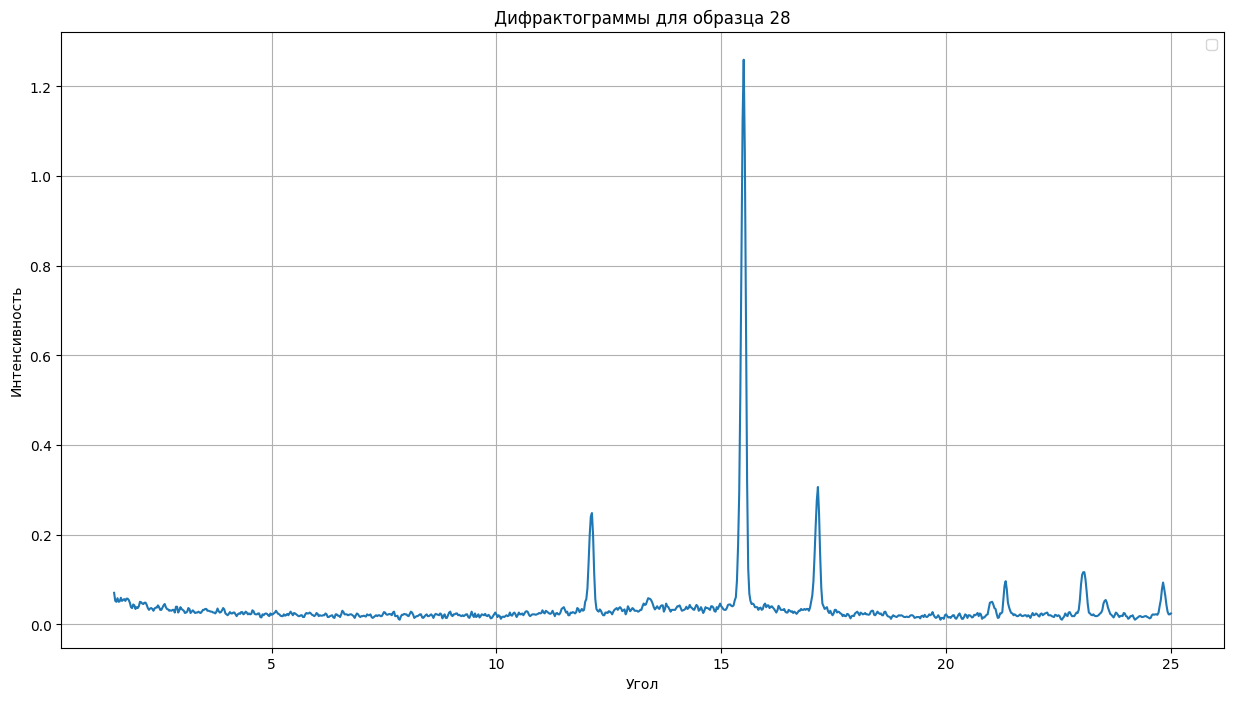

In [24]:
spectrum = np.array(unpacked_data)
start_angle = 1.5
angle_step = 0.025
scale_factor = 0.001
angles = np.arange(start_angle, start_angle + angle_step*len(spectrum), angle_step)
scaled_spectrum = np.array(spectrum) * scale_factor


plt.figure(figsize=(15, 8))
plt.plot(angles, scaled_spectrum, linewidth=1.5)
plt.title("Дифрактограммы для образца 28")
plt.xlabel("Угол")
plt.ylabel("Интенсивность")
plt.grid(True)
plt.legend()
plt.show()

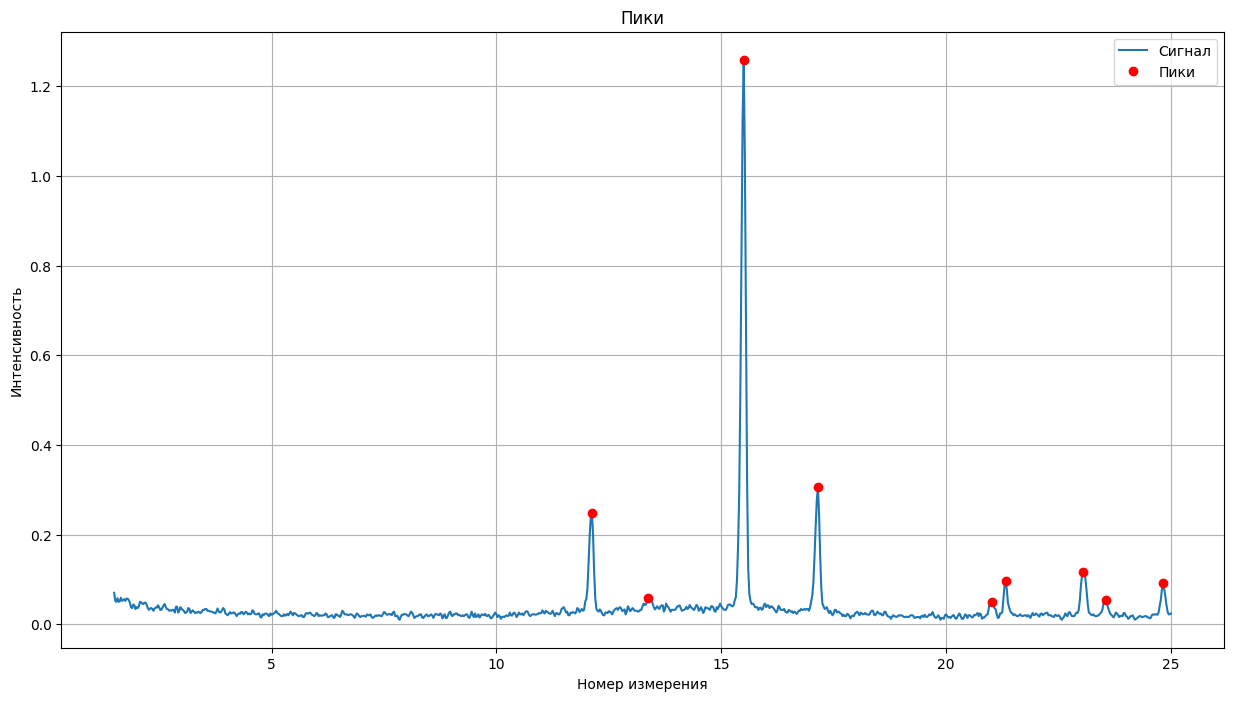

In [25]:
min_height = 0.05  # Минимальная высота пика
min_distance = 5   # Минимальное расстояние между пиками
# Находим все пики
peaks, _ = find_peaks(scaled_spectrum, height=min_height, distance=min_distance)

# Удаляем нежелательные пики
peaks = peaks[3:]
plt.figure(figsize=(15,8))
plt.plot(angles, scaled_spectrum, label='Сигнал')
plt.plot(angles[peaks], scaled_spectrum[peaks], 'ro', label='Пики')
plt.xlabel('Номер измерения')
plt.ylabel('Интенсивность')
plt.title('Пики')
plt.legend()
plt.grid()

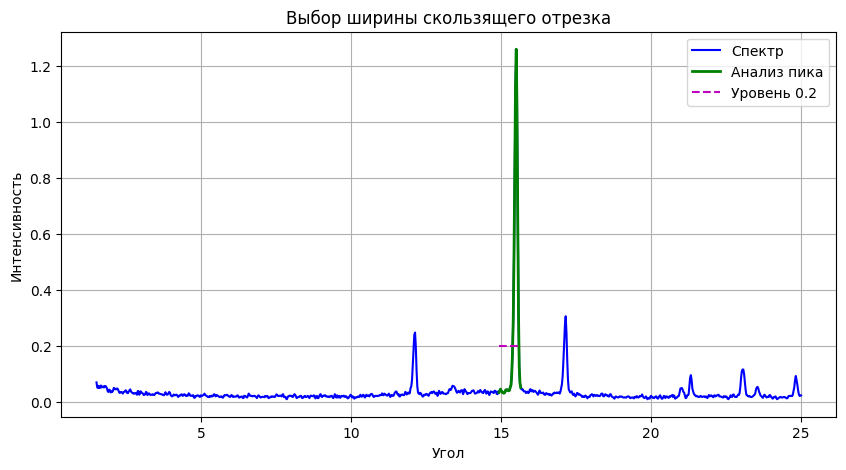

In [130]:
peak_pos = peaks[1]  # позиция пика
left = peak_pos - 15 # 20 точек слева от пика
right = peak_pos + 15  # 20 точек справа

# Углы и значения в зоне анализа
analysis_angles = angles[left:right]  
analysis_window = scaled_spectrum[left:right]


plt.figure(figsize=(10, 5))
plt.plot(angles, scaled_spectrum, 'b-', label='Спектр')
plt.plot(analysis_angles, analysis_window, 'g-', linewidth=2, label='Анализ пика')
plt.plot(analysis_angles, [0.2]*len(analysis_angles), 'm--', label='Уровень 0.2') 
plt.title("Выбор ширины скользящего отрезка")
plt.xlabel('Угол')
plt.ylabel('Интенсивность')
plt.legend()
plt.grid(True)
plt.show()

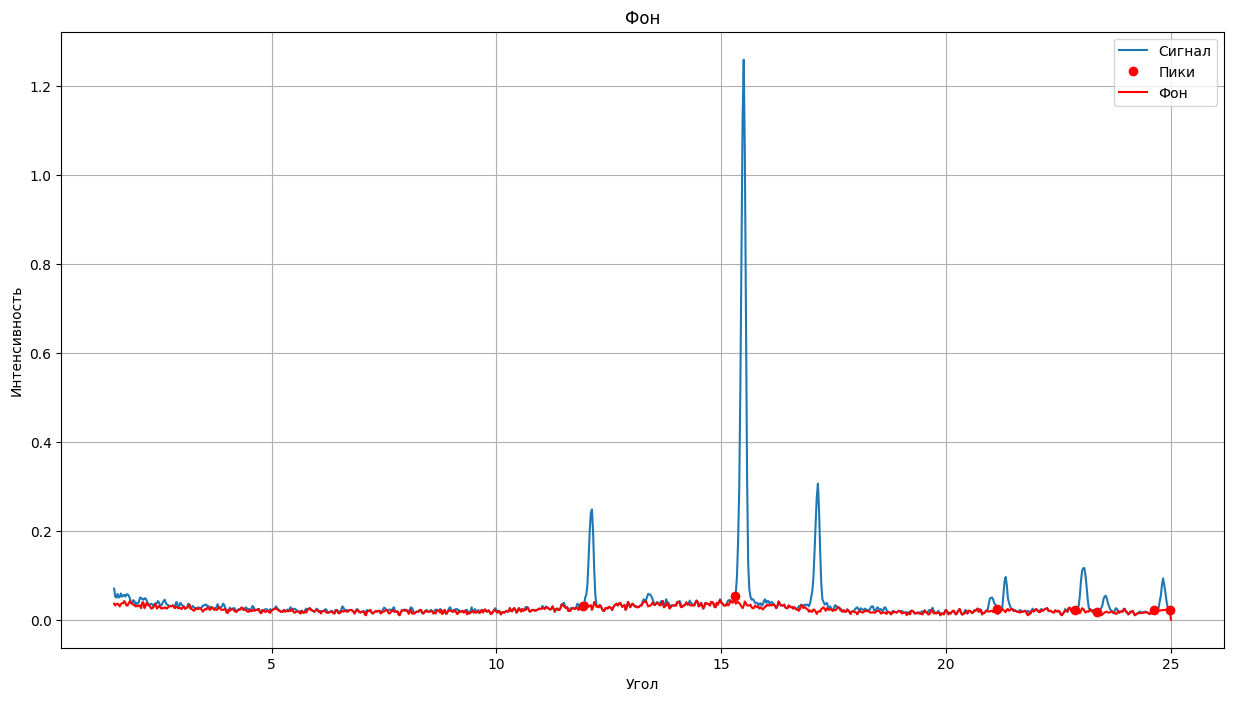

In [132]:
# Ищем фон
background = np.zeros(scaled_spectrum.shape[0])

for current_position in range(scaled_spectrum.shape[0]):
    if current_position + len(analysis_angles) + 1 > len(scaled_spectrum):
        break
        
    start_value = scaled_spectrum[current_position]
    end_value = scaled_spectrum[current_position + len(analysis_angles)]
    
    if end_value > start_value:
        step_size = (end_value - start_value)/len(analysis_angles)
        line = np.arange(start_value, end_value, step_size)
    elif start_value > end_value:
        step_size = (start_value - end_value)/len(analysis_window)
        line = np.arange(end_value, start_value, step_size)
    elif abs(start_value - end_value) < 0.05:
        line = np.full(len(analysis_window), start_value)
    
    spectrum_segment = scaled_spectrum[current_position:current_position+len(analysis_window)]
    
    for comparison_index in range(len(analysis_window)):
        if spectrum_segment[comparison_index] > line[comparison_index]:
            background[current_position + comparison_index] = line[comparison_index]
        else:
            background[current_position + comparison_index] = spectrum_segment[comparison_index]

plt.figure(figsize=(15,8))
plt.plot(angles, scaled_spectrum, label='Сигнал')
plt.plot(angles[peaks], scaled_spectrum[peaks], 'ro', label='Пики')
plt.plot(angles, background, color='r', label='Фон')
plt.xlabel('Угол')
plt.ylabel('Интенсивность')
plt.title('Фон')
plt.grid(True)
plt.legend()
plt.show()

In [28]:
peak_indices = [
    i for i in range(len(scaled_spectrum))
    if scaled_spectrum[i] - background[i] >= 0.0115
]
peak_indices = np.array(peak_indices)[21:]  
peak_indices

array([264, 416, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 474,
       475, 476, 477, 478, 479, 552, 553, 554, 555, 556, 557, 558, 559,
       560, 561, 562, 563, 564, 565, 566, 568, 569, 578, 579, 581, 582,
       584, 585, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629,
       630, 631, 633, 634, 635, 674, 675, 686, 728, 752, 779, 780, 781,
       782, 783, 784, 791, 792, 793, 794, 795, 796, 859, 860, 861, 862,
       863, 864, 865, 866, 880, 881, 882, 883, 884, 885, 930, 931, 932,
       933, 934, 935, 936, 940])

In [29]:
peak_groups = []
current_group = [peak_indices[0]]  # Начинаем первую группу с первого пика

for i in range(1, len(peak_indices)):
    # Если разница между соседними пиками меньше 5 точек - добавляем в текущую группу
    if peak_indices[i] - peak_indices[i-1] < 5:
        current_group.append(peak_indices[i])
    else:
        # Если разница большая - сохраняем текущую группу и начинаем новую
        peak_groups.append(np.array(current_group))
        current_group = [peak_indices[i]]

# Добавляем последнюю группу
peak_groups.append(np.array(current_group))
peak_groups
groups_to_remove = [0, 4, 6, 7, 8, 9]  # удаляем 2-ю и 4-ю группы

# Создаем новый список без удаленных групп
filtered_groups = [group for i, group in enumerate(peak_groups) 
                  if i not in groups_to_remove]


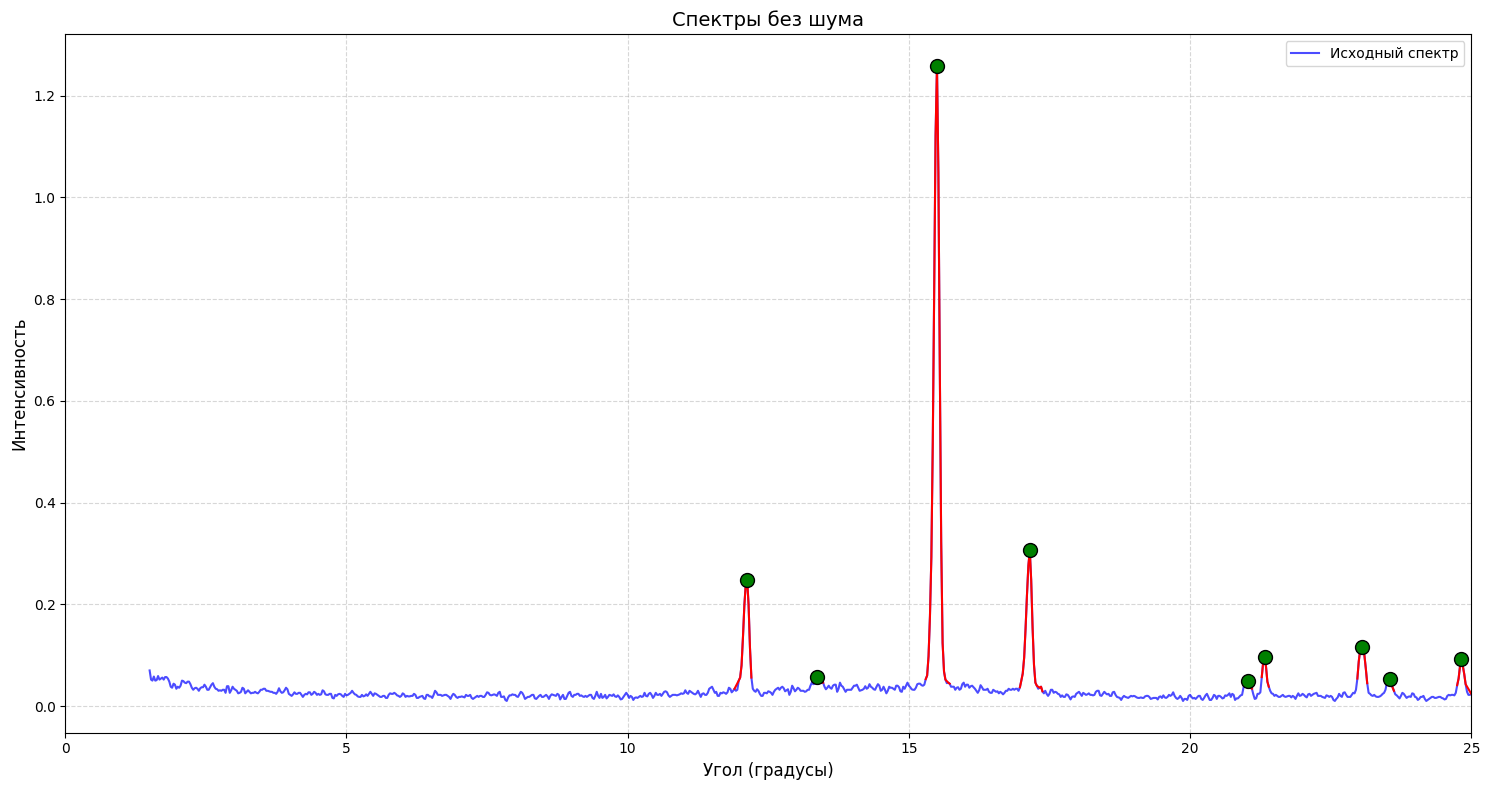

In [30]:
plt.figure(figsize=(15, 8))

# 1. Основной график спектра
plt.plot(angles, scaled_spectrum, 'b-', label='Исходный спектр', alpha=0.7)

# 2. Отображение отфильтрованных пиковых групп
for peak_group in filtered_groups:
    # Границы пика
    plt.plot(angles[peak_group], scaled_spectrum[peak_group], 'r-', linewidth=1.5)
    
    # Максимальная точка пика
    peak_max_idx = peak_group[np.argmax(scaled_spectrum[peak_group])]
    plt.scatter(angles[peak_max_idx], scaled_spectrum[peak_max_idx], 
                color='green', edgecolor='black', s=100, zorder=3)

# Настройки графика
plt.xlim(0, 25)
plt.xlabel('Угол (градусы)', fontsize=12)
plt.ylabel('Интенсивность', fontsize=12)
plt.title('Спектры без шума', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [31]:
peaks

array([425, 475, 560, 626, 781, 793, 862, 882, 933])

C:\Users\Ольга\AppData\Local\Temp\ipykernel_19632\2747723564.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


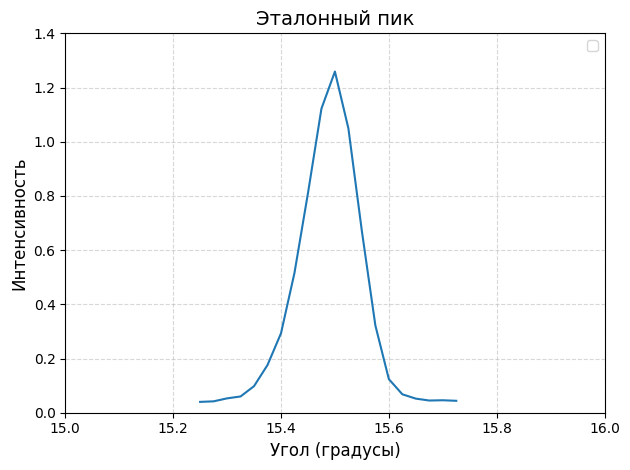

In [32]:
# Определяем зону вокруг пика (10 точек в каждую сторону)
peak_center = peaks[2]  # Центральная позиция пика
window_size = 10        # Размер окна в точках

# Создаем зону анализа
analysis_zone = slice(peak_center - window_size, peak_center + window_size)

# Извлекаем данные для эталонного пика
etalon_angles = angles[analysis_zone]
etalon_spectrum = scaled_spectrum[analysis_zone]
plt.plot(etalon_angles, etalon_spectrum)
plt.xlim(15, 16)
plt.ylim(0,1.4)
plt.xlabel('Угол (градусы)', fontsize=12)
plt.ylabel('Интенсивность', fontsize=12)
plt.title('Эталонный пик', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\Ольга\AppData\Local\Temp\ipykernel_19632\3410440659.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


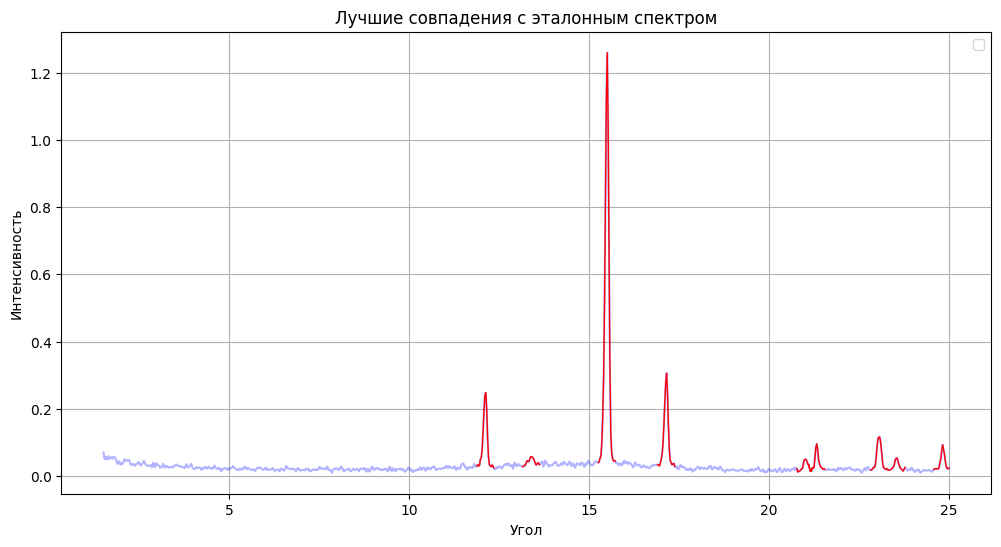

In [33]:
h_min = 0.04
c_min = 0.8
win = 20

# Данные
etalon = scaled_spectrum[analysis_zone]
corr = []

# Расчет корреляции
for i in range(len(scaled_spectrum)):
    end = min(i+win, len(scaled_spectrum))
    w = scaled_spectrum[i:end]
    c = np.corrcoef(etalon[:len(w)], w)[0,1] if len(w) > 1 else 0
    corr.append(c)

# Поиск пиков
peaks = [i for i in range(len(corr)) 
        if (i == 0 or corr[i] > corr[i-1]) and 
           (i == len(corr)-1 or corr[i] > corr[i+1]) and
           corr[i] > c_min and 
           max(scaled_spectrum[i:min(i+win, len(scaled_spectrum))]) > h_min]

# Визуализация
plt.figure(figsize=(12,6))
plt.plot(angles, scaled_spectrum, 'b-', alpha=0.3)

for i in sorted(peaks, key=lambda x: -corr[x])[:9]:
    end = min(i+win, len(scaled_spectrum))
    plt.plot(angles[i:end], scaled_spectrum[i:end], 'r-', linewidth=1)

plt.title('Лучшие совпадения с эталонным спектром')
plt.xlabel('Угол')
plt.ylabel('Интенсивность')
plt.legend()
plt.grid(True)
plt.show()

# Образец № 89

In [34]:
data2 = r"C:\Users\Ольга\Downloads\89.DAT"

with open(data2, 'rb') as file:   
    data2 = file.read()    
    value_size = 4 
    skip_bytes = 7 * value_size  
    remaining_data = data2[skip_bytes:]       
    num_values = len(remaining_data) // value_size
    unpacked_data2 = struct.unpack(f'{num_values}i', remaining_data)      
    print(unpacked_data2)

(49, 47, 45, 42, 39, 38, 37, 37, 36, 34, 34, 34, 35, 34, 33, 33, 33, 32, 31, 32, 32, 32, 32, 35, 37, 36, 34, 32, 31, 30, 29, 29, 27, 25, 25, 27, 28, 28, 28, 27, 26, 26, 27, 27, 26, 25, 24, 22, 21, 21, 22, 24, 26, 26, 26, 25, 25, 24, 24, 25, 26, 27, 27, 27, 28, 27, 24, 22, 22, 23, 24, 24, 26, 27, 25, 23, 22, 23, 25, 26, 26, 26, 25, 23, 24, 26, 26, 24, 23, 23, 23, 22, 21, 21, 23, 25, 27, 26, 23, 21, 21, 22, 23, 22, 21, 20, 21, 23, 23, 22, 21, 21, 20, 20, 20, 19, 19, 18, 17, 18, 20, 21, 21, 20, 20, 20, 21, 22, 23, 22, 21, 21, 20, 18, 18, 18, 18, 19, 20, 20, 21, 22, 22, 21, 19, 19, 20, 20, 19, 19, 20, 21, 21, 20, 19, 17, 15, 13, 14, 16, 18, 17, 15, 14, 14, 15, 16, 17, 17, 17, 18, 19, 19, 18, 17, 18, 19, 20, 19, 18, 17, 16, 16, 17, 17, 16, 16, 16, 17, 18, 18, 18, 19, 19, 18, 16, 15, 15, 16, 19, 21, 20, 18, 15, 14, 14, 13, 12, 13, 15, 17, 17, 17, 16, 16, 16, 16, 17, 18, 19, 19, 19, 20, 22, 24, 24, 27, 34, 35, 31, 28, 27, 26, 24, 22, 21, 20, 18, 18, 20, 21, 21, 21, 24, 28, 30, 28, 24, 22, 21,

C:\Users\Ольга\AppData\Local\Temp\ipykernel_19632\3166194756.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


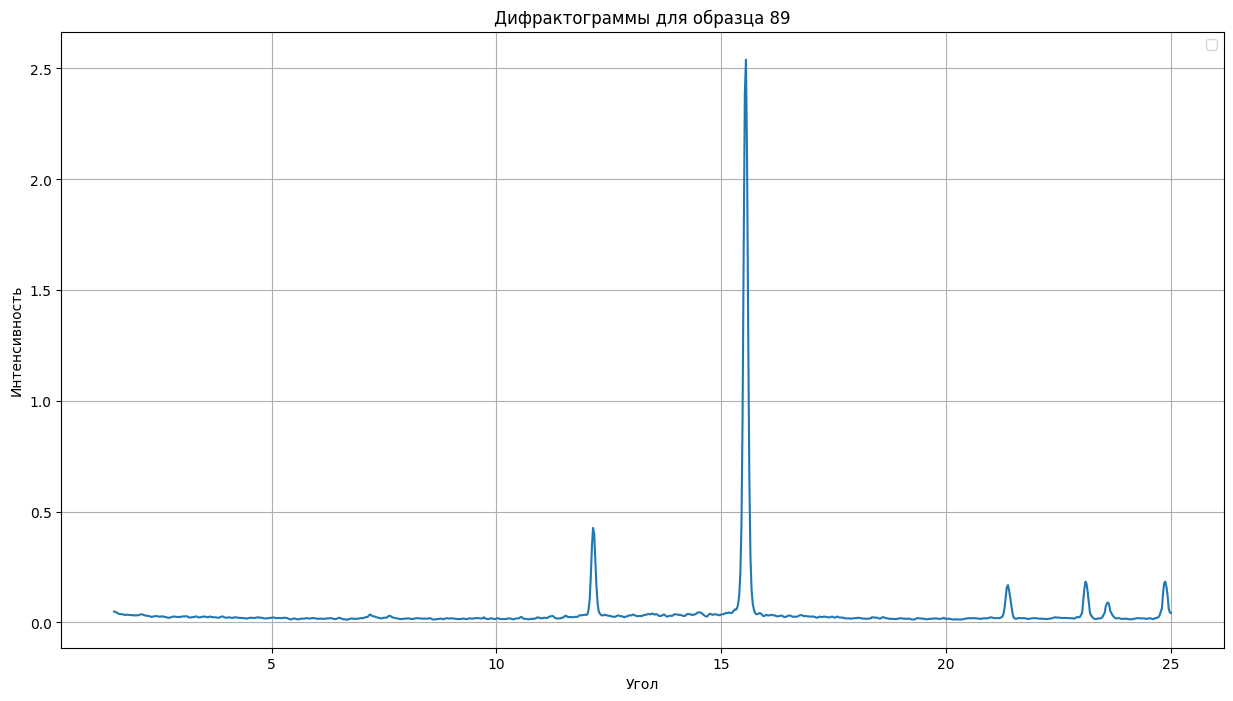

In [35]:
spectrum2 = np.array(unpacked_data2)

start_angle = 1.5
angle_step = 0.025
scale_factor = 0.001
angles = np.arange(start_angle, start_angle + angle_step*len(spectrum2), angle_step)

scale_factor = 0.001
scaled_spectrum2 = np.array(spectrum2) * scale_factor

plt.figure(figsize=(15, 8))
plt.plot(angles, scaled_spectrum2, linewidth=1.5)
plt.title("Дифрактограммы для образца 89")
plt.xlabel("Угол")
plt.ylabel("Интенсивность")
plt.grid(True)
plt.legend()
plt.show()

array([426, 562, 795, 864, 884, 935])

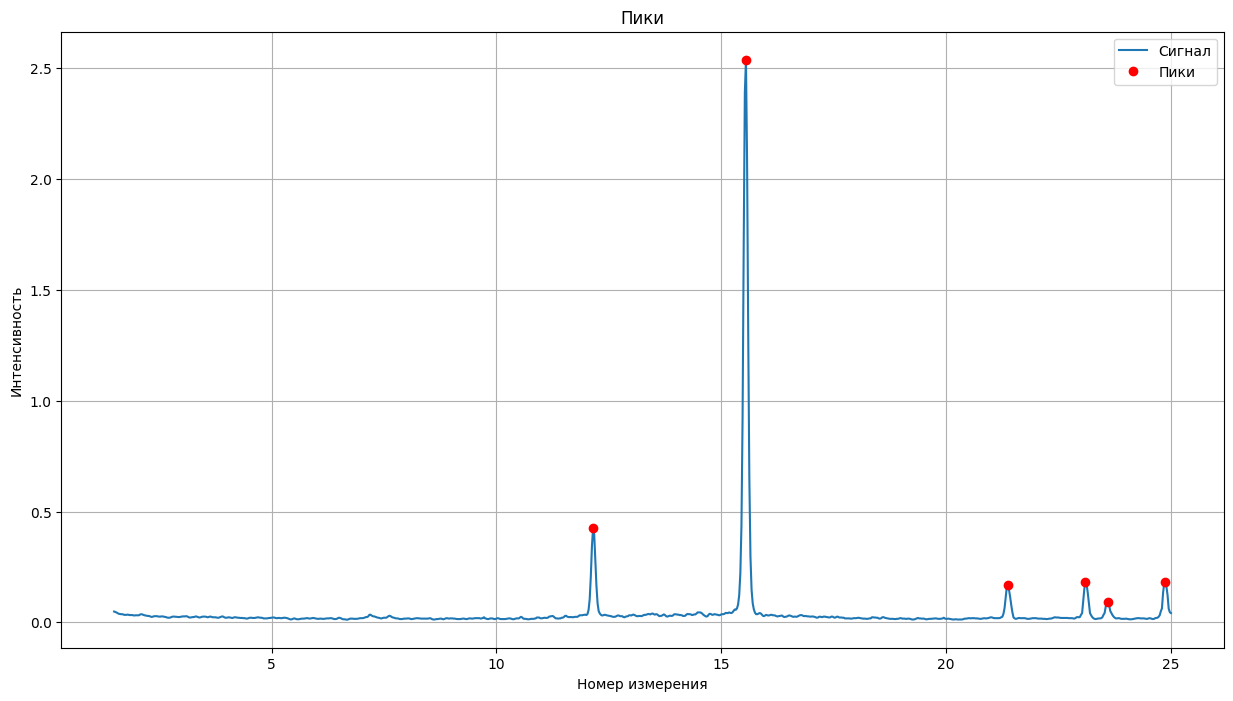

In [114]:
min_height = 0.07  # Минимальная высота пика
min_distance = 2   # Минимальное расстояние между пиками
# Находим все пики
peaks_2, _ = find_peaks(scaled_spectrum2, height=min_height, distance=min_distance)
plt.figure(figsize=(15,8))
plt.plot(angles, scaled_spectrum2, label='Сигнал')
plt.plot(angles[peaks_2], scaled_spectrum2[peaks_2], 'ro', label='Пики')
plt.xlabel('Номер измерения')
plt.ylabel('Интенсивность')
plt.title('Пики')
plt.legend()
plt.grid()
peaks_2

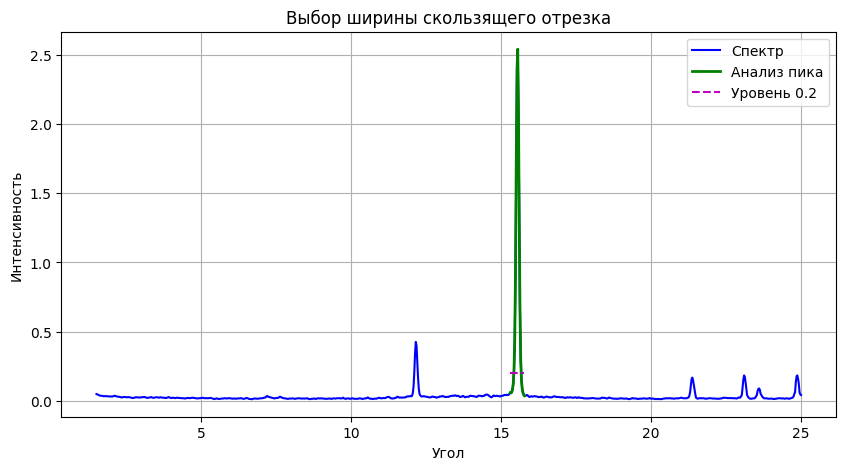

In [48]:
peak_pos = peaks_2[1]  # позиция пика
left = peak_pos - 10 # 20 точек слева от пика
right = peak_pos + 10  # 20 точек справа

# Углы и значения в зоне анализа
analysis_angles = angles[left:right]  
analysis_window = scaled_spectrum2[left:right]


plt.figure(figsize=(10, 5))
plt.plot(angles, scaled_spectrum2, 'b-', label='Спектр')
plt.plot(analysis_angles, analysis_window, 'g-', linewidth=2, label='Анализ пика')
plt.plot(analysis_angles, [0.2]*len(analysis_angles), 'm--', label='Уровень 0.2') 
plt.title("Выбор ширины скользящего отрезка")
plt.xlabel('Угол')
plt.ylabel('Интенсивность')
plt.legend()
plt.grid(True)
plt.show()

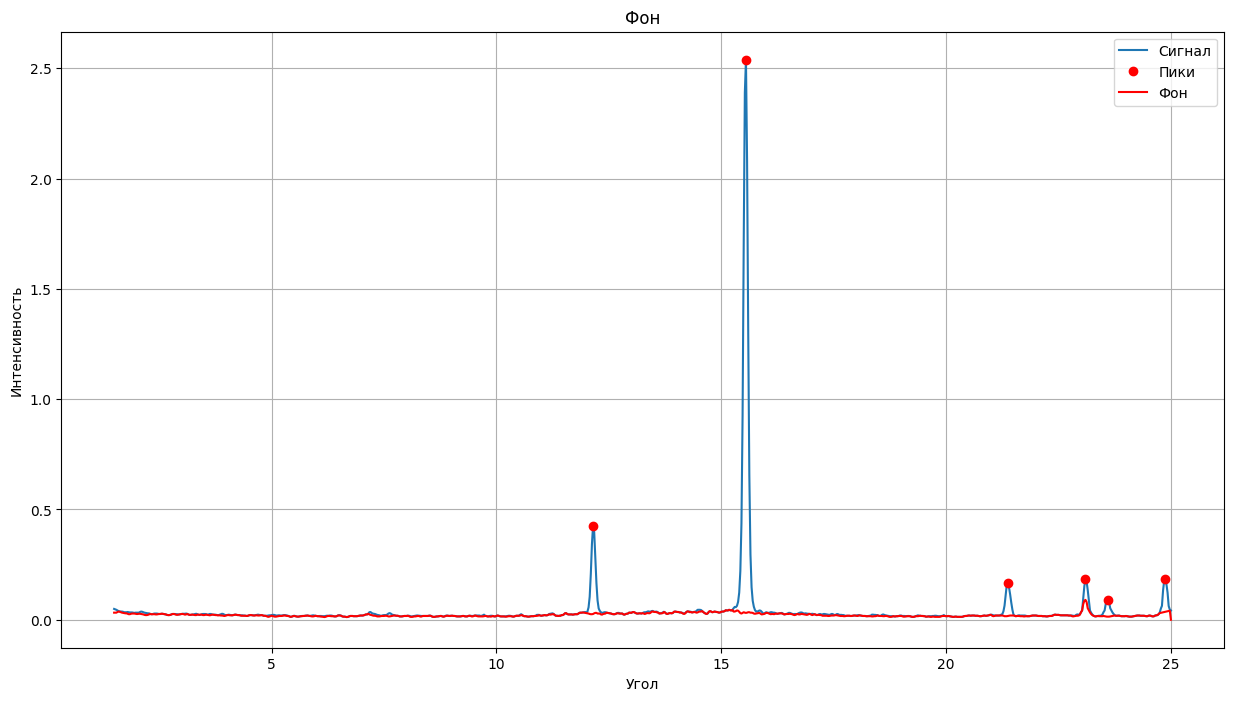

In [49]:
# Ищем фон
background = np.zeros(scaled_spectrum2.shape[0])

for current_position in range(scaled_spectrum2.shape[0]):
    if current_position + len(analysis_angles) + 1 > len(scaled_spectrum2):
        break
        
    start_value = scaled_spectrum2[current_position]
    end_value = scaled_spectrum2[current_position + len(analysis_angles)]
    
    if end_value > start_value:
        step_size = (end_value - start_value)/len(analysis_angles)
        line = np.arange(start_value, end_value, step_size)
    elif start_value > end_value:
        step_size = (start_value - end_value)/len(analysis_window)
        line = np.arange(end_value, start_value, step_size)
    elif abs(start_value - end_value) < 0.05:
        line = np.full(len(analysis_window), start_value)
    
    spectrum_segment = scaled_spectrum2[current_position:current_position+len(analysis_window)]
    
    for comparison_index in range(len(analysis_window)):
        if spectrum_segment[comparison_index] > line[comparison_index]:
            background[current_position + comparison_index] = line[comparison_index]
        else:
            background[current_position + comparison_index] = spectrum_segment[comparison_index]

plt.figure(figsize=(15,8))
plt.plot(angles, scaled_spectrum2, label='Сигнал')
plt.plot(angles[peaks_2], scaled_spectrum2[peaks_2], 'ro', label='Пики')
plt.plot(angles, background, color='r', label='Фон')
plt.xlabel('Угол')
plt.ylabel('Интенсивность')
plt.title('Фон')
plt.grid(True)
plt.legend()
plt.show()

In [85]:
peak_indices = [
    i for i in range(len(scaled_spectrum2))
    if scaled_spectrum2[i] - background[i] >= 0.0115
]
peak_indices = np.array(peak_indices)[7:]  
peak_indices

array([422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 519, 551,
       552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564,
       565, 566, 567, 568, 569, 570, 575, 576, 791, 792, 793, 794, 795,
       796, 797, 798, 799, 862, 863, 864, 865, 866, 867, 880, 881, 882,
       883, 884, 885, 886, 887, 888, 931, 932, 933, 934, 935, 936, 937,
       938, 940])

In [121]:
peak_groups_2 = []
current_group = [peak_indices[0]]  # Начинаем первую группу с первого пика

for i in range(1, len(peak_indices)):
    # Если разница между соседними пиками меньше 5 точек - добавляем в текущую группу
    if peak_indices[i] - peak_indices[i-1] < 5:
        current_group.append(peak_indices[i])
    else:
        # Если разница большая - сохраняем текущую группу и начинаем новую
        peak_groups_2.append(np.array(current_group))
        current_group = [peak_indices[i]]

# Добавляем последнюю группу
peak_groups_2.append(np.array(current_group))
peak_groups_2
groups_to_remove = [1, 3]  

# Создаем новый список без удаленных групп
filtered_groups = [group for i, group in enumerate(peak_groups_2) 
                  if i not in groups_to_remove]

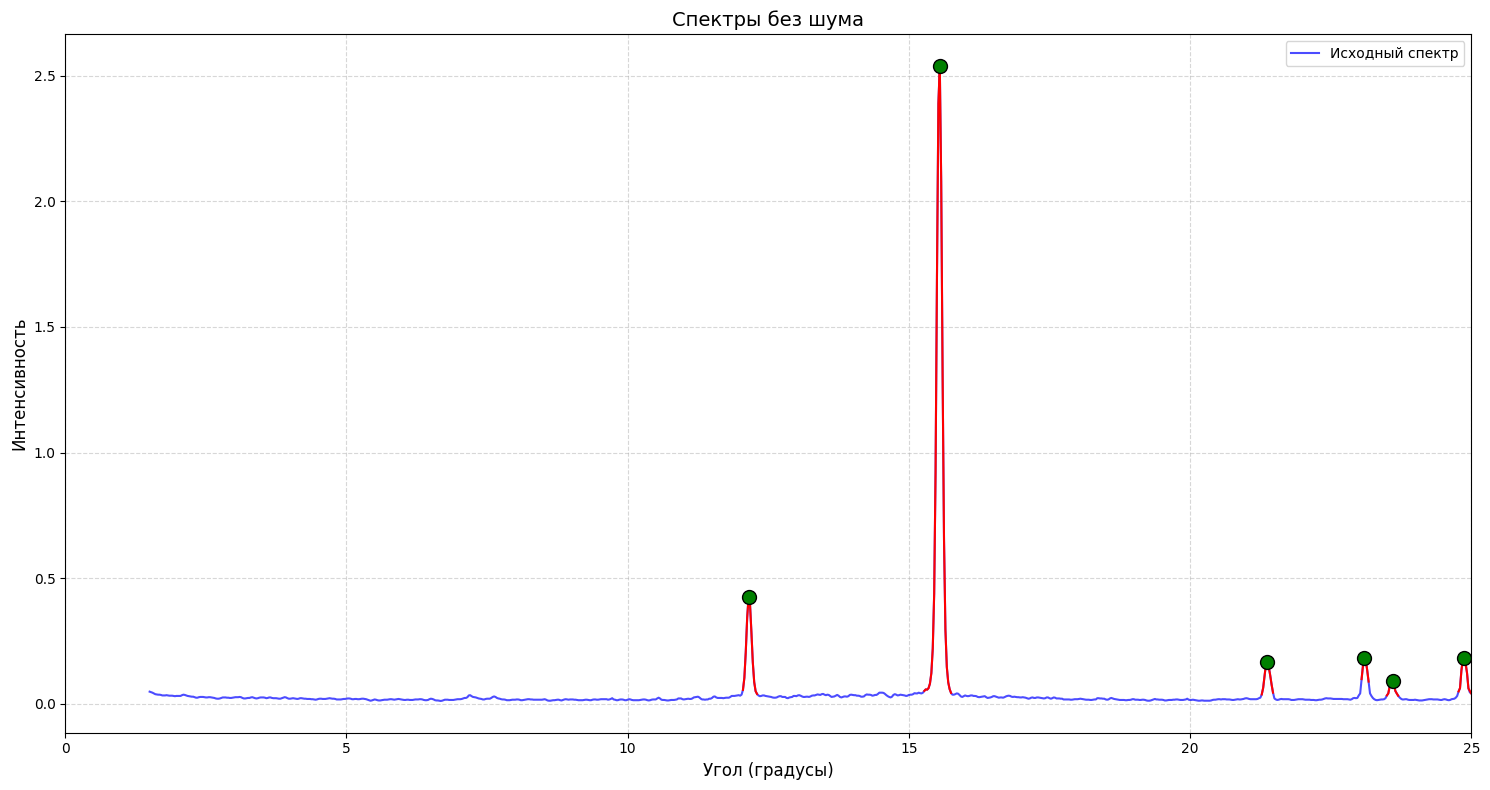

In [122]:
plt.figure(figsize=(15, 8))

# Основной график спектра
plt.plot(angles, scaled_spectrum2, 'b-', label='Исходный спектр', alpha=0.7)

# Отображение отфильтрованных пиковых групп
for peak_group in filtered_groups:
    # Границы пика
    plt.plot(angles[peak_group], scaled_spectrum2[peak_group], 'r-', linewidth=1.5)
    
    # Максимальная точка пика
    peak_max_idx = peak_group[np.argmax(scaled_spectrum2[peak_group])]
    plt.scatter(angles[peak_max_idx], scaled_spectrum2[peak_max_idx], 
                color='green', edgecolor='black', s=100, zorder=3)

# Настройки графика
plt.xlim(0, 25)
plt.xlabel('Угол (градусы)', fontsize=12)
plt.ylabel('Интенсивность', fontsize=12)
plt.title('Спектры без шума', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\Ольга\AppData\Local\Temp\ipykernel_19632\1217736253.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


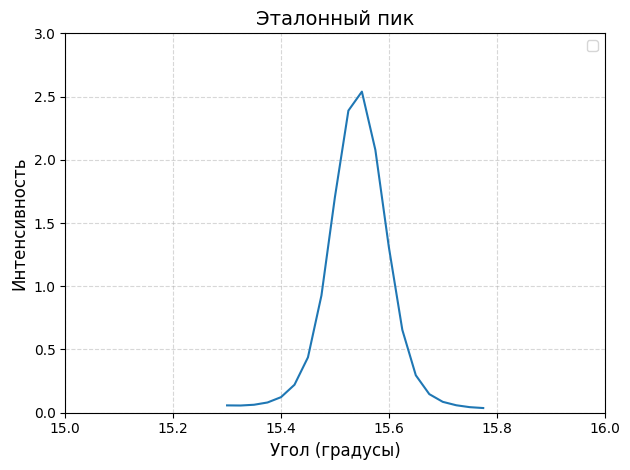

In [120]:
# Определяем зону вокруг пика (10 точек в каждую сторону)
peak_center = peaks_2[1]  # Центральная позиция пика
window_size = 10        # Размер окна в точках

# Создаем зону анализа
analysis_zone = slice(peak_center - window_size, peak_center + window_size)

# Извлекаем данные для эталонного пика
etalon_angles = angles[analysis_zone]
etalon_spectrum2 = scaled_spectrum2[analysis_zone]
plt.plot(etalon_angles, etalon_spectrum2)
plt.xlim(15, 16)
plt.ylim(0,3)
plt.xlabel('Угол (градусы)', fontsize=12)
plt.ylabel('Интенсивность', fontsize=12)
plt.title('Эталонный пик', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\Ольга\AppData\Local\Temp\ipykernel_19632\3857706936.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


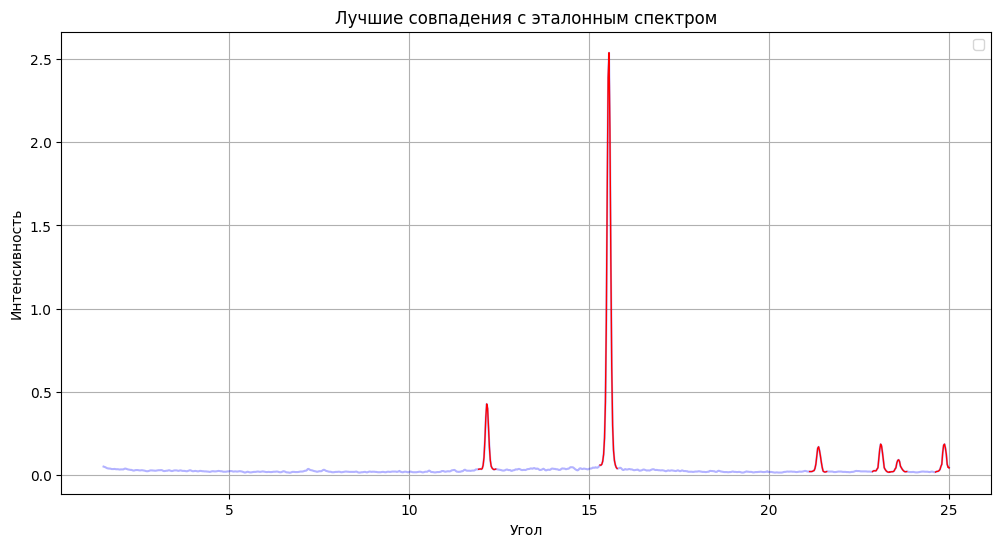

In [123]:
h_min = 0.04
c_min = 0.8
win = 20

# Данные
etalon = scaled_spectrum2[analysis_zone]
corr = []

# Расчет корреляции
for i in range(len(scaled_spectrum2)):
    end = min(i+win, len(scaled_spectrum2))
    w = scaled_spectrum2[i:end]
    c = np.corrcoef(etalon[:len(w)], w)[0,1] if len(w) > 1 else 0
    corr.append(c)

# Поиск пиков
peaks_2 = [i for i in range(len(corr)) 
        if (i == 0 or corr[i] > corr[i-1]) and 
           (i == len(corr)-1 or corr[i] > corr[i+1]) and
           corr[i] > c_min and 
           max(scaled_spectrum2[i:min(i+win, len(scaled_spectrum2))]) > h_min]

# Визуализация
plt.figure(figsize=(12,6))
plt.plot(angles, scaled_spectrum2, 'b-', alpha=0.3)

for i in sorted(peaks_2, key=lambda x: -corr[x])[:9]:
    end = min(i+win, len(scaled_spectrum2))
    plt.plot(angles[i:end], scaled_spectrum2[i:end], 'r-', linewidth=1)

plt.title('Лучшие совпадения с эталонным спектром')
plt.xlabel('Угол')
plt.ylabel('Интенсивность')
plt.legend()
plt.grid(True)
plt.show()